In [1]:
#importing libraries and packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#data import
data = pd.read_csv('E:\SP Jain\python files_boot camp project\DataCosuppychain dataset\Final data set_analysisv1.0.csv',header= 0,encoding='unicode_escape')
pd.set_option('display.max_columns',None)
data.head()

,Day,Month,Year,Time,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Category Id,Product Name,Product Price,Shipping Mode,Late_delivery_risk
0,31,1,2018,22:56:00,3,4,91.250000,314.640015,Advance shipping,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,725.0,2,Fitness,Pacific Asia,Bekasi,Indonesia,20755,77202,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,Standard Class,0
1,13,1,2018,12:27:00,5,4,-249.089996,311.359985,Late delivery,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,725.0,2,Fitness,Pacific Asia,Bikaner,India,19492,75939,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,73,Smart watch,327.75,Standard Class,1
2,13,1,2018,12:06:00,4,4,-247.779999,309.720001,Shipping on time,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,95125.0,2,Fitness,Pacific Asia,Bikaner,India,19491,75938,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,Standard Class,0
3,13,1,2018,11:45:00,3,4,22.860001,304.809998,Advance shipping,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,90027.0,2,Fitness,Pacific Asia,Townsville,Australia,19490,75937,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,73,Smart watch,327.75,Standard Class,0
4,13,1,2018,11:24:00,2,4,134.210007,298.250000,Advance shipping,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,725.0,2,Fitness,Pacific Asia,Townsville,Australia,19489,75936,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,73,Smart watch,327.75,Standard Class,0


In [4]:
# missing value identification
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')
            
features_with_missing_values(data)

Percentage of Total Missing Values is  0.0 %
Missing Value Estimation :
The Feature  Customer Zipcode  has 3 missing values


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 40 columns):
Day                              180519 non-null int64
Month                            180519 non-null int64
Year                             180519 non-null int64
Time                             180519 non-null object
Days for shipping (real)         180519 non-null int64
Days for shipment (scheduled)    180519 non-null int64
Benefit per order                180519 non-null float64
Sales per customer               180519 non-null float64
Delivery Status                  180519 non-null object
Category Id                      180519 non-null int64
Category Name                    180519 non-null object
Customer City                    180519 non-null object
Customer Country                 180519 non-null object
Customer Id                      180519 non-null int64
Customer Segment                 180519 non-null object
Customer Zipcode                 180516 non-null float

In [18]:
#split dataset in features and target variable
features = ['Days for shipping (real)','Days for shipment (scheduled)','Customer Country'
            ,'Order Region','Shipping Mode','Category Name']
x = data[features]
x.head()

,Days for shipping (real),Days for shipment (scheduled),Customer Country,Order Region,Shipping Mode,Category Name
0,3,4,Puerto Rico,Southeast Asia,Standard Class,Sporting Goods
1,5,4,Puerto Rico,South Asia,Standard Class,Sporting Goods
2,4,4,EE. UU.,South Asia,Standard Class,Sporting Goods
3,3,4,EE. UU.,Oceania,Standard Class,Sporting Goods
4,2,4,Puerto Rico,Oceania,Standard Class,Sporting Goods


In [19]:
#One-Hot encoding categotical variables in the data
x_encoded = pd.get_dummies(x)
x_encoded.shape

(180519, 81)

In [20]:
x_features = x_encoded
y_features = data['Late_delivery_risk']

In [21]:
# Split dataset into training set and test set
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X_train, X_test, y_train, y_test = train_test_split(x_features, y_features, test_size=0.2, random_state=1) # 80% training and 20% test

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [23]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9363228451141148


In [24]:
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from termcolor import colored as cl # text customization
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))


Accuracy of the model is 94%


In [25]:
#tree.plot_tree(clf)

In [26]:
x_features.head()

,Days for shipping (real),Days for shipment (scheduled),Customer Country_EE. UU.,Customer Country_Puerto Rico,Order Region_Canada,Order Region_Caribbean,Order Region_Central Africa,Order Region_Central America,Order Region_Central Asia,Order Region_East Africa,Order Region_East of USA,Order Region_Eastern Asia,Order Region_Eastern Europe,Order Region_North Africa,Order Region_Northern Europe,Order Region_Oceania,Order Region_South America,Order Region_South Asia,Order Region_South of USA,Order Region_Southeast Asia,Order Region_Southern Africa,Order Region_Southern Europe,Order Region_US Center,Order Region_West Africa,Order Region_West Asia,Order Region_West of USA,Order Region_Western Europe,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Category Name_Accessories,Category Name_As Seen on TV!,Category Name_Baby,Category Name_Baseball & Softball,Category Name_Basketball,Category Name_Books,Category Name_Boxing & MMA,Category Name_CDs,Category Name_Cameras,Category Name_Camping & Hiking,Category Name_Cardio Equipment,Category Name_Children's Clothing,Category Name_Cleats,Category Name_Computers,Category Name_Consumer Electronics,Category Name_Crafts,Category Name_DVDs,Category Name_Electronics,Category Name_Fishing,Category Name_Fitness Accessories,Category Name_Garden,Category Name_Girls' Apparel,Category Name_Golf Apparel,Category Name_Golf Bags & Carts,Category Name_Golf Balls,Category Name_Golf Gloves,Category Name_Golf Shoes,Category Name_Health and Beauty,Category Name_Hockey,Category Name_Hunting & Shooting,Category Name_Indoor/Outdoor Games,Category Name_Kids' Golf Clubs,Category Name_Lacrosse,Category Name_Men's Clothing,Category Name_Men's Footwear,Category Name_Men's Golf Clubs,Category Name_Music,Category Name_Pet Supplies,Category Name_Shop By Sport,Category Name_Soccer,Category Name_Sporting Goods,Category Name_Strength Training,Category Name_Tennis & Racquet,Category Name_Toys,Category Name_Trade-In,Category Name_Video Games,Category Name_Water Sports,Category Name_Women's Apparel,Category Name_Women's Clothing,Category Name_Women's Golf Clubs
0,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,5,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [27]:

features_names = x_features.columns[:]

In [28]:
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import plot_tree # tree diagram

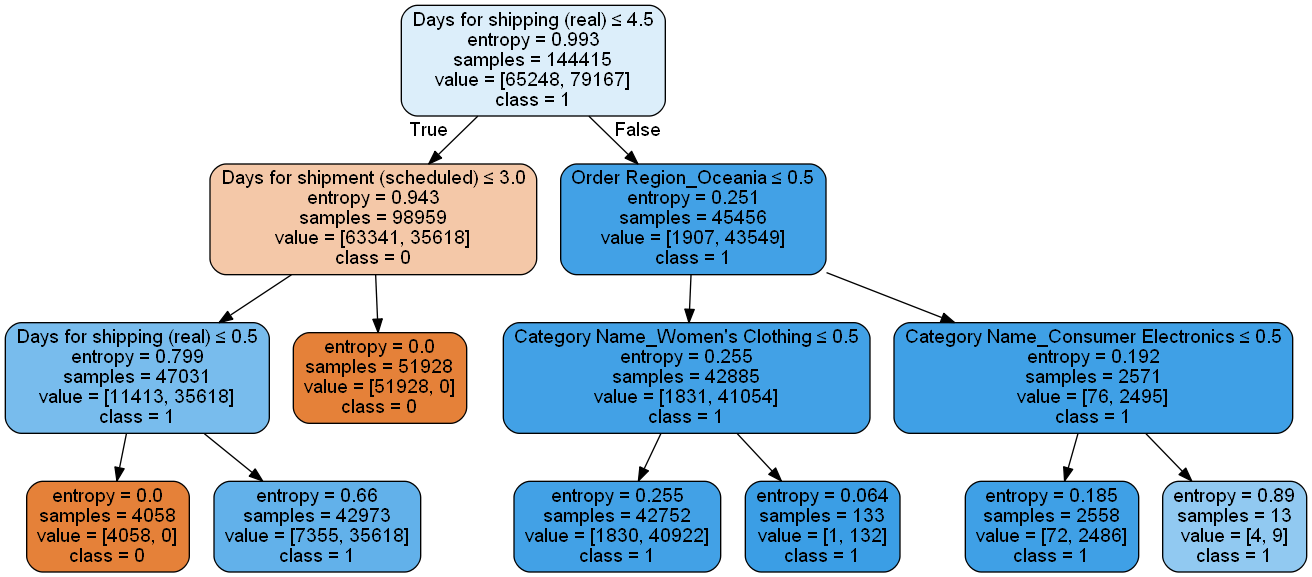

In [29]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('late_payment.png')
Image(graph.create_png())

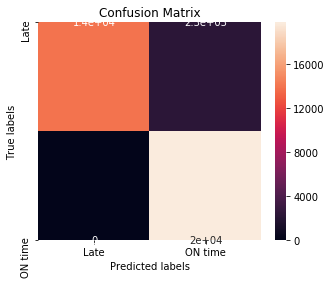

In [30]:
plt.rcParams['figure.figsize']=5,4
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
#sns.heatmap(cm,vmin=-1000, vmax=50000, annot=True, ax = ax,annot_kws={"size": 15},fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Late', 'ON time']); ax.yaxis.set_ticklabels(['Late', 'ON time']);
#plt.savefig("conf.png")

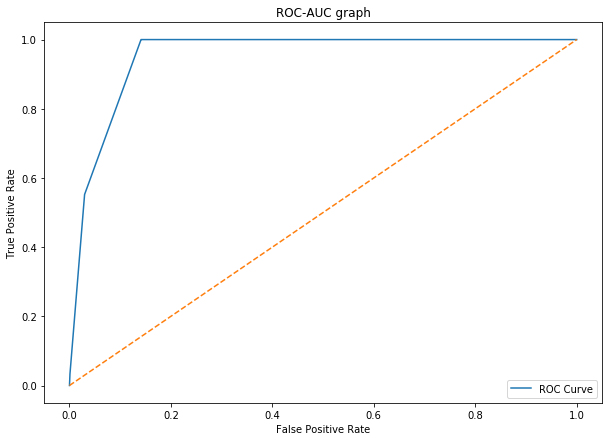

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
fpr, tpr, thres = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.rcParams['figure.figsize']=10,7
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

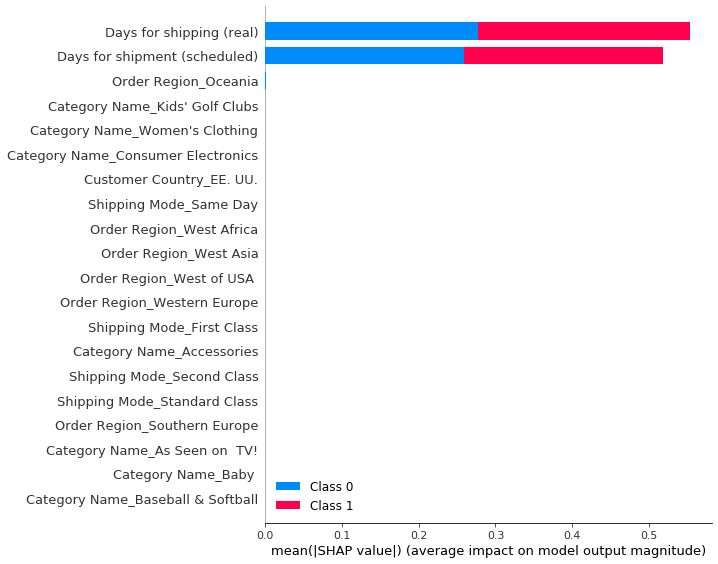

In [32]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")